In [1]:
import cv2
import numpy as np
import shap
import matplotlib.pyplot as plt
import tensorflow as tf

2025-05-09 06:17:50.812271: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746771471.011274      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746771471.069621      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
def classify_image(preprocessed_image, model):
    # Add batch dimension to the preprocessed image
    X_array = np.expand_dims(preprocessed_image, axis=0)

    # Get model predictions
    predictions = model(X_array)

    # Convert predictions to numpy array
    predictions_np = predictions.numpy()

    # Print the outputs of the final layer
    print("Outputs of the final layer:", predictions_np)

    # Optionally, return the predictions for further use
    return predictions_np

In [3]:
import tensorflow as tf

# Load the entire model
model = tf.keras.models.load_model('/kaggle/input/mobilenetnew/tensorflow2/default/1/signlanguagedetectionmodel(New).h5')
path='/kaggle/input/newdataoutput/output (1).png'

I0000 00:00:1746771482.294505      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1746771482.295258      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [4]:
def runScript(path, model):
    img = cv2.imread(path)

    if img is not None:  # Check if the image was loaded successfully
        # Resize the image to (224, 224)
        img_resized = cv2.resize(img, (224, 224))

        # Convert to RGB
        img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

        # Normalize image (adjust normalization as per your model's requirements)
        preprocessed_image = img_rgb.astype(np.float32) / 255.0  # Example normalization

        # Add batch dimension for SHAP and model
        X_array = np.expand_dims(preprocessed_image, axis=0)  # Shape: (1, 224, 224, 3)

        # Initialize SHAP masker
        masker = shap.maskers.Image("blur(3,3)", X_array[0].shape)

        # Define model prediction function
        def model_predict(images):
            images = np.array(images)  # Ensure correct format
            predictions = model(images)  # Ensure model can handle this input
            return predictions.numpy()  # Convert tensor to numpy array

        # Class names
        class_names = [ 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K',
                       'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
                       'W', 'X', 'Y']

        # Initialize SHAP explainer
        explainer = shap.Explainer(model_predict, masker, output_names=class_names)

        # Compute SHAP values
        shap_values = explainer(X_array, max_evals=20000, batch_size=1)

        # Plot and save SHAP values with large figure
        shap.image_plot(shap_values, show=False)  # Generate the plot but don't show immediately
        plt.gcf().set_size_inches(15, 15)         # Resize the current figure
        plt.suptitle("SHAP Values for Image Classification", fontsize=32)

        # Save the plot to a file
        plt.savefig("/kaggle/working/3originalshap_plot_output.png", dpi=300, bbox_inches='tight')
        plt.show()  # Optionally show it as well

        # Classify the image and print predictions
        prediction = classify_image(preprocessed_image, model)  # Ensure this function is defined
        print("Model Prediction:", prediction)

        # Display the original image with the prediction as title
        plt.figure(figsize=(5, 5))
        plt.imshow(img_rgb)
        plt.title(f"Original Image - Prediction: {prediction}")
        plt.axis('off')
        plt.show()

    else:
        print("Error: Image not found or could not be loaded.")

I0000 00:00:1746771488.378961      31 cuda_dnn.cc:529] Loaded cuDNN version 90300


  0%|          | 0/19998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [11:31, 691.78s/it]              


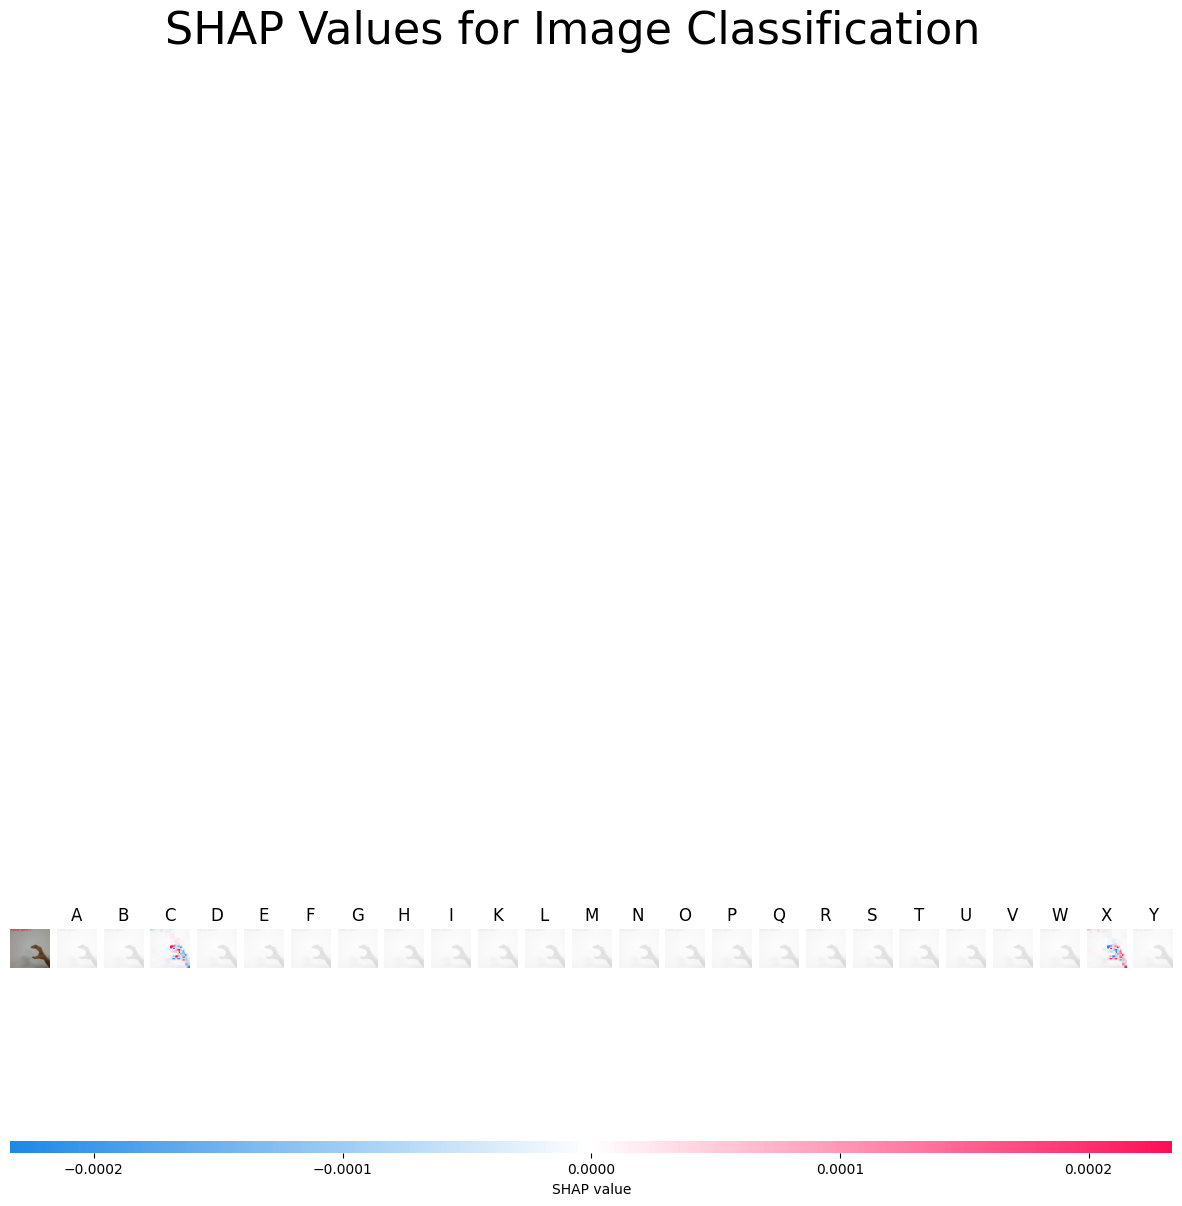

Outputs of the final layer: [[8.9432293e-09 8.0691114e-12 8.1320089e-01 1.8870632e-11 3.8821486e-07
  1.1734751e-12 2.6564776e-05 6.6747918e-07 1.1570485e-08 1.1025566e-08
  1.0111494e-06 7.0348463e-13 2.5325658e-06 6.1554701e-08 2.9262821e-03
  7.9480483e-04 3.9087427e-06 1.7027670e-06 1.7114515e-07 3.1961560e-09
  2.5541308e-08 6.0195821e-11 1.8304098e-01 2.6659284e-09]]
Model Prediction: [[8.9432293e-09 8.0691114e-12 8.1320089e-01 1.8870632e-11 3.8821486e-07
  1.1734751e-12 2.6564776e-05 6.6747918e-07 1.1570485e-08 1.1025566e-08
  1.0111494e-06 7.0348463e-13 2.5325658e-06 6.1554701e-08 2.9262821e-03
  7.9480483e-04 3.9087427e-06 1.7027670e-06 1.7114515e-07 3.1961560e-09
  2.5541308e-08 6.0195821e-11 1.8304098e-01 2.6659284e-09]]


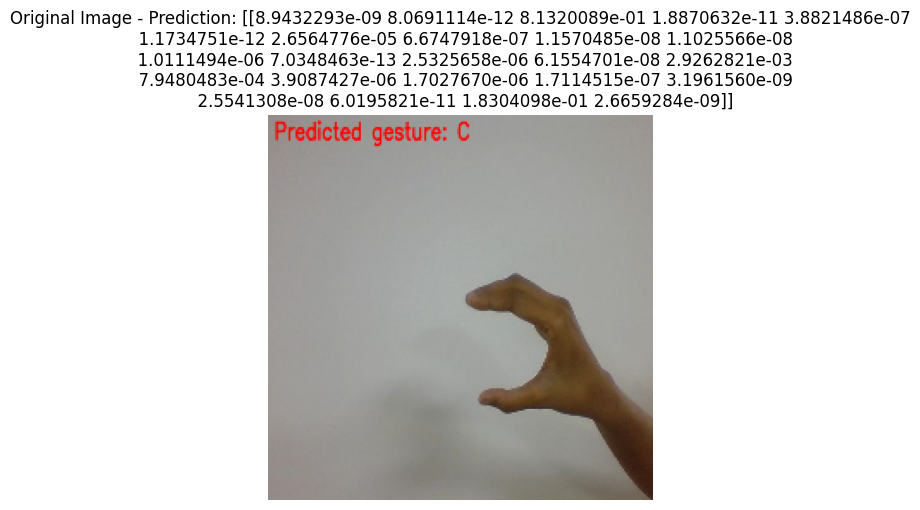

In [5]:
runScript(path, model)